In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playlists-individual/320_hold_back.csv
/kaggle/input/playlists-individual/542_until_its_gone.csv
/kaggle/input/playlists-individual/373_cant_deal.csv
/kaggle/input/playlists-individual/505_miles_away.csv
/kaggle/input/playlists-individual/618_the_right_time.csv
/kaggle/input/playlists-individual/95_times_up.csv
/kaggle/input/playlists-individual/782_heaven_in_your_eyes.csv
/kaggle/input/playlists-individual/238_hustling.csv
/kaggle/input/playlists-individual/720_next_time.csv
/kaggle/input/playlists-individual/639_try_to_resist.csv
/kaggle/input/playlists-individual/78_no_resolution.csv
/kaggle/input/playlists-individual/324_no_trace.csv
/kaggle/input/playlists-individual/495_do_you.csv
/kaggle/input/playlists-individual/35_someone_you_need.csv
/kaggle/input/playlists-individual/231_back_on_my_beat.csv
/kaggle/input/playlists-individual/188_pinky_promise.csv
/kaggle/input/playlists-individual/815_flying.csv
/kaggle/input/playlists-individual/80_searching.csv
/kaggle/input

In [2]:
!pip install spotipy --quiet
import pandas as pd
import spotipy as spotipy
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth

# Project Outline

- download a dataset of spotify playlists
- find or write a library to handle genre etc analysis
- group similar playlists
- use plotting techniques to show clusters?

Project Proposal:
I am personally interested in analyzing my longterm listening and curation history through Spotify and spotipy. I have an extensive collection of playlists, which due to their regularity, can be analyzed as objects. The intention of the analysis is to uncover trends in the groupings, visualize the relative distances (similarities) of songs within playlists, and create a prediction mechanism for most similar playlists. I will use sklearn, matplotlib, and seaborn for the clustering and visualizations.


# Getting User Data

In [3]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
client_id = user_secrets.get_secret("client_id")
client_secret = user_secrets.get_secret("client_secret")
username = user_secrets.get_secret("username")
redirect_uri = user_secrets.get_secret("redirect_uri")

In [4]:
#OAuth (not working)

# scope = "playlist-read-private"
# sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
#                                                 client_secret=client_secret,
#                                                 redirect_uri=redirect_uri,
#                                                 scope=scope))

In [5]:
#token (not working)

# token = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

# cache_token = token.get_access_token()
# sp = spotipy.Spotify(cache_token)

# results1 = sp.user_playlist(username)

In [6]:
#client credentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))

# Get Playlists

In [7]:
# results = sp.current_user_playlists()
# for playlist in results['items']:
#     print("Playlist Name:", playlist['name'])
#     print("Playlist ID:", playlist['id'])
#     print()

In [8]:
import re

def extract_title(filename):
    match = re.search(r'^(.*?)\.csv$', filename)
    title = re.search(r'[^/]+$', match.group(1))
    if match:
        return title.group(0)
    else:
        return None

In [9]:
import os

folder_path = '/kaggle/input/playlists-individual/'
p = pd.DataFrame()
for playlist in os.listdir(folder_path):
    df = pd.read_csv(folder_path + playlist, header=0, on_bad_lines='skip')
    df['title'] = extract_title(playlist)
    p = pd.concat([p, df], ignore_index=True)

In [10]:
p_copy = p.groupby('title').size().reset_index(name='count')
irregular = p_copy[p_copy['count'] != 10]
irregulars = irregular['title']
p = p[~p['title'].isin(irregulars)]
p

,Spotify ID,Artist IDs,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Added By,Added At,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,title
0,6UFivO2zqqPFPoQYsEMuCc,3l0CmX0FuQjFxr8SK7Vqag,Bags,Immunity,Clairo,2019-08-02,260519,77,spotify:user:nightrainlily,2019-08-05T15:37:34Z,...,-7.694,1.0,0.0315,0.172000,0.380000,0.1150,0.868,104.996,4.0,320_hold_back
1,0oxYB9GoOIDrdzniNdKC44,72X6FHxaShda0XeQw3vbeF,When the Sun Hits,Souvlaki,Slowdive,1993,285906,73,spotify:user:nightrainlily,2019-08-05T15:37:22Z,...,-11.764,1.0,0.0263,0.001010,0.709000,0.1010,0.218,93.512,4.0,320_hold_back
2,1PeY7UcO6qNOvCYl8SapIi,1Goe2NezNnym45kco2xTk6,Bet She Looks Like You,Green Twins,Nick Hakim,2017-05-19,225360,0,spotify:user:nightrainlily,2019-08-01T22:51:20Z,...,-3.399,0.0,0.0313,0.094200,0.554000,0.3370,0.380,84.976,4.0,320_hold_back
3,4gZDCOFuLCxCRWNhSEcOtJ,0NIPkIjTV8mB795yEIiPYL,These Days,Spring EP,Wallows,2018-04-06,202626,63,spotify:user:nightrainlily,2019-08-03T16:58:40Z,...,-6.733,1.0,0.0272,0.039800,0.030200,0.0759,0.867,93.003,4.0,320_hold_back
4,1bwXRScnt3k6vSyVqcKyNj,5Wabl1lPdNOeIn0SQ5A1mp,Heaven Or Las Vegas,Heaven Or Las Vegas (Remastered),Cocteau Twins,1990-09-17,298400,0,spotify:user:nightrainlily,2019-08-03T22:04:51Z,...,-5.460,1.0,0.0379,0.000088,0.007250,0.0808,0.401,180.090,4.0,320_hold_back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8506,7Hx2EA4wGaxtsiZCVVLV1i,6P7H3ai06vU1sGvdpBwDmE,Deacon Blues,Aja,Steely Dan,1977-01-01,456640,0,spotify:user:nightrainlily,2018-12-11T00:46:49Z,...,-12.475,1.0,0.0355,0.437000,0.000472,0.1050,0.614,115.871,4.0,198_nostalgic
8507,6Rvlwah55rEmg1ufhBz022,3PhoLpVuITZKcymswpck5b,Goodbye Yellow Brick Road - Remastered 2014,Goodbye Yellow Brick Road (Remastered / Deluxe...,Elton John,1973-10-05,192826,0,spotify:user:nightrainlily,2018-12-11T00:46:49Z,...,-7.712,1.0,0.0279,0.446000,0.001410,0.1540,0.397,121.227,4.0,198_nostalgic
8508,7vOjTY220BqIttYDbwshED,5wugb0kaq0J6nyQ5Xgd17i,Chemicals React - Remix,Insomniatic,Aly & AJ,2007-01-01,175920,42,spotify:user:nightrainlily,2018-12-11T00:46:49Z,...,-4.541,1.0,0.0676,0.001400,0.000000,0.0781,0.428,132.713,4.0,198_nostalgic
8509,4OJFkrRQqol4FsPesF8eu4,3iDD7bnsjL9J4fO298r0L0,Saturday in the Park - 2002 Remaster,Chicago V (Expanded & Remastered),Chicago,1972-07-10,235666,63,spotify:user:nightrainlily,2018-12-11T00:46:49Z,...,-6.864,1.0,0.0341,0.155000,0.000000,0.0799,0.610,114.398,4.0,198_nostalgic


# Analysis

**Simple: Most Danceable Playlists**

In [11]:
grouped = p.groupby('title')
grouped.first()

,Spotify ID,Artist IDs,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Added By,Added At,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
title,,,,,,,,,,,,,,,,,,,,,
01_dream_of_you,390AWnOn2rfe9FzQjYmxIH,7290H8m1Dwt8G7jm1y9CQx,Wicked Game,Best of Chris Isaak (Remastered),Chris Isaak,2006,286880,0,spotify:user:nightrainlily,2018-12-11T00:47:41Z,...,9.0,-7.802,1.0,0.0262,0.74400,0.012200,0.0946,0.290,112.549,4.0
02_if_forever_never_comes,3EVNUWzRLvdiHwD1qQDQ7f,4Cedjq5BQL3MhapRvDpFED,That Teenage Feeling,Fox Confessor Brings The Flood (Bonus Track Ve...,Neko Case,2008-04-15,162933,33,spotify:user:nightrainlily,2018-12-11T00:47:55Z,...,0.0,-4.673,1.0,0.0265,0.81000,0.000466,0.0630,0.184,98.309,3.0
03_just_one_word,5Ai8XBxieq1CR263UdhGdF,04vj3iPUiVh5melWr0w3xT,Saint Claude (Version Française),Chaleur Humaine,Christine and the Queens,2014-06-02,239554,46,spotify:user:nightrainlily,2018-12-11T00:47:49Z,...,8.0,-11.522,1.0,0.0491,0.34400,0.020500,0.1030,0.155,98.925,4.0
04_take_it_back,2oHmRO0X4gW4VlCJRcZzez,1tqZaCwM57UFKjWoYwMLrw,Erase / Rewind,Gran Turismo,The Cardigans,1998-10-01,215760,48,spotify:user:nightrainlily,2018-12-17T17:06:33Z,...,11.0,-7.103,0.0,0.0317,0.00145,0.001120,0.1100,0.699,103.720,4.0
05_too_hard_to_say,4A9E08l34BkPsCDAmOpHxb,5zzrJD2jXrE9dZ1AklRFcL,Other Side Of The World,Eye To The Telescope,KT Tunstall,2005-01-01,214560,55,spotify:user:nightrainlily,2018-12-11T00:46:57Z,...,2.0,-5.368,1.0,0.0302,0.48500,0.000000,0.0830,0.369,80.039,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95_times_up,4DO5sD9fghVKEkPVM9PP8x,"5v0XTlB9FqNvfBfnw8n5b0,7BMccF0hQFBpP6417k1OtQ,...",Beautiful Life (feat. Action Bronson & Joey Ba...,Lucky 7,"Statik Selektah,Action Bronson,Joey Bada$$",2015-07-07,201848,28,spotify:user:nightrainlily,2018-12-11T00:46:49Z,...,1.0,-4.536,0.0,0.1880,0.05800,0.000000,0.0382,0.471,102.128,4.0
96_curse_the_sun,4JkOsslKrWDYYb5dcft9AH,2eam0iDomRHGBypaDQLwWI,Everybody Lost Somebody,Gone Now,Bleachers,2017-06-02,235253,47,spotify:user:nightrainlily,2018-12-11T00:47:47Z,...,0.0,-8.724,1.0,0.2450,0.02200,0.001550,0.0958,0.254,183.737,4.0
97_rejoice,5GW97dX1VfhPhLvXyMGaSk,"7hJcb9fa4alzcOq3EaNPoG,1eNO1DUCOtZgCzlwtjtb1t",Go On,Neva Left,"Snoop Dogg,October London",2017-05-19,190237,33,spotify:user:nightrainlily,2018-12-11T00:46:50Z,...,10.0,-2.800,0.0,0.2330,0.16800,0.000019,0.2590,0.762,106.031,4.0


In [12]:
dance_ranked = grouped.mean('danceability').sort_values('Danceability', ascending=False)
dance_ranked.head()

,Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
title,,,,,,,,,,,,,,
653_be_ready,188587.4,32.4,0.7836,0.6593,6.7,-7.6567,0.5,0.17301,0.227567,0.047125,0.14211,0.5383,111.3619,3.9
304_not_tonight,276985.8,36.1,0.7779,0.6523,4.9,-6.8788,0.8,0.09015,0.042527,0.127539,0.10387,0.6444,110.4775,4.0
738_hit_up,195945.2,37.8,0.7673,0.6237,5.7,-7.5372,0.8,0.13223,0.279241,0.088296,0.13753,0.6345,117.8477,4.1
642_ready_to_go,190213.5,51.5,0.7589,0.7300,6.1,-6.0371,0.5,0.07954,0.141181,0.002288,0.22826,0.7846,111.8712,4.0
719_mis_secretos,190523.7,54.7,0.7560,0.5250,5.8,-7.5982,0.5,0.09883,0.304481,0.000861,0.17280,0.5140,103.9040,4.0


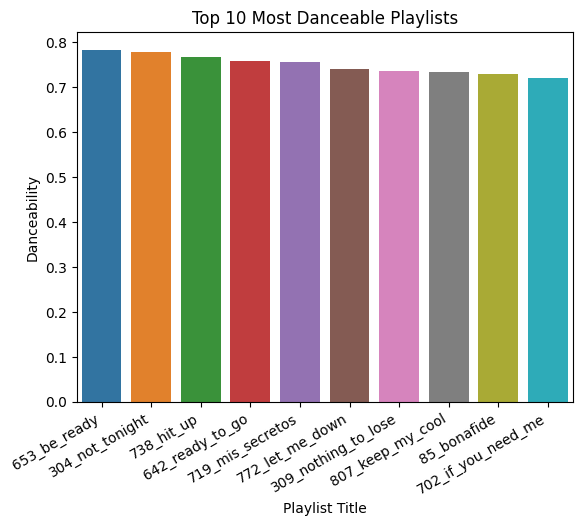

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

dance10 = dance_ranked.iloc[:10]

sns.barplot(x=dance10.index, y = 'Danceability', data = dance10)
plt.xticks(rotation=30, fontsize=10, horizontalalignment='right')
plt.xlabel('Playlist Title')
plt.title('Top 10 Most Danceable Playlists')
plt.show()

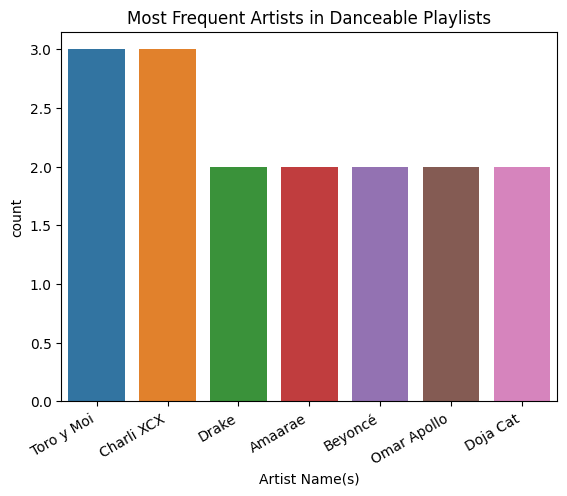

In [14]:
pdance10 = p[p['title'].isin(dance10.index)]
dance_artist = pd.DataFrame(pdance10['Artist Name(s)'].value_counts()).reset_index()
dance_artist = dance_artist[dance_artist['count']>1]

sns.barplot(x=dance_artist['Artist Name(s)'], y=dance_artist['count'])
plt.xticks(rotation=30, fontsize=10, horizontalalignment='right')
plt.xlabel('Artist Name(s)')
plt.title('Most Frequent Artists in Danceable Playlists')
plt.show()

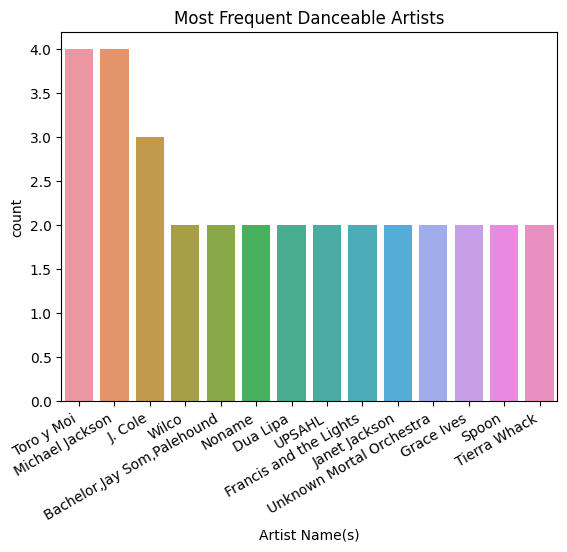

In [15]:
by_artists = p.sort_values(by=['Danceability'], ascending=False).iloc[:100]

by_artist_counts = pd.DataFrame(by_artists['Artist Name(s)'].value_counts()).reset_index()
by_artist_counts = by_artist_counts[by_artist_counts['count']>1]

sns.barplot(x=by_artist_counts['Artist Name(s)'], y=by_artist_counts['count'])
plt.xticks(rotation=30, fontsize=10, horizontalalignment='right')
plt.xlabel('Artist Name(s)')
plt.title('Most Frequent Danceable Artists')
plt.show()

**Intermediate: Naive Genre Ranking**

In [16]:
p.groupby(['title', 'Genres']).first()

Spotify ID  \
title           Genres                                                                       
01_dream_of_you alternative r&b,uk contemporary r&b                 0uII79GWhvmTIvruhfIXlf   
                australian pop,pop,viral pop,auckland indie,eth...  0M4tj5zmIrL4JpJUcE8D1F   
                canadian pop,dance pop,pop                          7cWLl1E5iMvqIVhpmtUp6k   
                chamber pop,indie anthem-folk,indie folk,irish ...  3rocTBn0NsGrVAHGOZNzH5   
                dance pop,new wave pop,soft rock                    2LMX0orTToTGD8XrsPGGmR   
...                                                                                    ...   
99_morphine     art pop,baroque pop,brooklyn indie,indie rock,n...  0szSOfZVM3G5mWI1ogQjr7   
                australian indie,australian indie folk              0qBNqTmydPChSA0NUkMZ9f   
                downtempo,electronica,trip hop,ethereal wave,sc...  67Hna13dNDkZvBpTXRIaOJ   
                indie poptimism                                     5tR4MFnmZKLjY5ccrSPyki   
                pop                                                 4u9Y4Z9i9VaAbBK7rW1Rha   

                                                                                                       Artist IDs  \
title           Genres                                                                                              
01_dream_of_you alternative r&b,uk contemporary r&b                                        7aFTOGFDEqDtJUCziLVsVC   
                australian pop,pop,viral pop,auckland indie,eth...  3WGpXCj9YhhfX11TToZcXP,5r5Va4lVQ1zjEfbJSrmCsS   
                canadian pop,dance pop,pop                                                 6sFIWsNpZYqfjUpaCgueju   
                chamber pop,indie anthem-folk,indie folk,irish ...                         7FDlvgcodNfC0IBdWevl4u   
                dance pop,new wave pop,soft rock                                           4PpmBoqphQusNFsxuVKb6j   
...                                                                                                           ...   
99_morphine     art pop,baroque pop,brooklyn indie,indie rock,n...                         2Jv5eshHtLycR6R8KQCdc4   
                australian indie,australian indie folk                                     2NqgE99Ll5vOTvmbN7O2R6   
                downtempo,electronica,trip hop,ethereal wave,sc...  6FXMGgJwohJLUSr5nVlf9X,791Z3924aa619hZ3xsOJEx   
                indie poptimism                                                            3VjZEaHXvNbCmV5jc0VfZR   
                pop                                                                        6KImCVD70vtIoJWnq6nGn3   

                                                                                Track Name  \
title           Genres                                                                       
01_dream_of_you alternative r&b,uk contemporary r&b                           Fool to Love   
                australian pop,pop,viral pop,auckland indie,eth...                    EASE   
                canadian pop,dance pop,pop                                       This Kiss   
                chamber pop,indie anthem-folk,indie folk,irish ...             Higher Love   
                dance pop,new wave pop,soft rock                         Forever Your Girl   
...                                                                                    ...   
99_morphine     art pop,baroque pop,brooklyn indie,indie rock,n...          Mourning Sound   
                australian indie,australian indie folk                            Stranger   
                downtempo,electronica,trip hop,ethereal wave,sc...                Teardrop   
                indie poptimism                                                       NoLo   
                pop                                                 Meet Me in the Hallway   

                                                                                      Album Name  \
title       

In [17]:
cleaned = p[p['Genres'].notna()]
cleaned['Genres']

0                        bedroom pop,indie pop,pov: indie
1       alternative rock,dream pop,reading indie,shoegaze
2               alternative r&b,hypnagogic pop,indie soul
3                                              pov: indie
4       alternative rock,art pop,dream pop,ethereal wa...
                              ...                        
8506    album rock,classic rock,country rock,folk rock...
8507                glam rock,mellow gold,piano rock,rock
8508                   dance pop,girl group,post-teen pop
8509    album rock,classic rock,mellow gold,rock,soft ...
8510    ambient,art pop,art rock,compositional ambient...
Name: Genres, Length: 7788, dtype: object

In [18]:
genres = cleaned.groupby('title').agg({'Genres': lambda x: list(x)})
genres.info

<bound method DataFrame.info of                                                                       Genres
title                                                                       
01_dream_of_you            [mellow gold, australian pop,pop,viral pop,auc...
02_if_forever_never_comes  [alternative country,canadian indie,canadian s...
03_just_one_word           [art pop,electro-pop francais,metropopolis,shi...
04_take_it_back            [lilith,new wave pop,permanent wave,pop rock,s...
05_too_hard_to_say         [ectofolk,lilith,neo mellow,pop rock,scottish ...
...                                                                      ...
95_times_up                [alternative hip hop,boom bap,boston hip hop,e...
96_curse_the_sun           [indie pop,indie poptimism,modern rock,pov: in...
97_rejoice                 [g funk,gangster rap,hip hop,pop rap,rap,west ...
98_the_shape_we_make       [art pop,chamber pop,indie rock,indietronica,n...
99_morphine                [pop, abstract,dr

In [19]:
def flatten(l):
    flat = []
    for item in l:
        if "," in item:
            split = [x for x in item.split(',')]
            flat.append(split)
        else:
            split = [item]
            flat.append(split)
    return [item for row in flat for item in row]

genres['Genres'] = genres['Genres'].apply(flatten)

In [20]:
from collections import Counter
genres['counts'] = genres['Genres'].apply(Counter)
genres

,Genres,counts
title,,
01_dream_of_you,"[mellow gold, australian pop, pop, viral pop, ...","{'mellow gold': 1, 'australian pop': 1, 'pop':..."
02_if_forever_never_comes,"[alternative country, canadian indie, canadian...","{'alternative country': 1, 'canadian indie': 2..."
03_just_one_word,"[art pop, electro-pop francais, metropopolis, ...","{'art pop': 6, 'electro-pop francais': 1, 'met..."
04_take_it_back,"[lilith, new wave pop, permanent wave, pop roc...","{'lilith': 1, 'new wave pop': 1, 'permanent wa..."
05_too_hard_to_say,"[ectofolk, lilith, neo mellow, pop rock, scott...","{'ectofolk': 1, 'lilith': 1, 'neo mellow': 1, ..."
...,...,...
95_times_up,"[alternative hip hop, boom bap, boston hip hop...","{'alternative hip hop': 2, 'boom bap': 1, 'bos..."
96_curse_the_sun,"[indie pop, indie poptimism, modern rock, pov:...","{'indie pop': 1, 'indie poptimism': 3, 'modern..."
97_rejoice,"[g funk, gangster rap, hip hop, pop rap, rap, ...","{'g funk': 1, 'gangster rap': 1, 'hip hop': 5,..."


In [21]:
def most(d):
    return max(d.items(), key=lambda x: x[1])

genres['most'] = genres['counts'].apply(most)
genres[['most_genre', 'most_count']] = genres['most'].apply(pd.Series)
genres.sort_values(by=['most_count'], ascending=False)

,Genres,counts,most,most_genre,most_count
title,,,,,
573_do_you_care_if_i_stay,"[chamber pop, indie folk, indie rock, indietro...","{'chamber pop': 6, 'indie folk': 1, 'indie roc...","(indie rock, 9)",indie rock,9
699_nightmare,"[dark trap, drill, hip hop, miami hip hop, pop...","{'dark trap': 1, 'drill': 1, 'hip hop': 8, 'mi...","(rap, 9)",rap,9
651_the_dead_of_night,"[alternative rock, modern rock, permanent wave...","{'alternative rock': 4, 'modern rock': 8, 'per...","(modern rock, 8)",modern rock,8
655_tell_you_everything,"[la pop, canadian pop, dance pop, pop, pop, po...","{'la pop': 1, 'canadian pop': 1, 'dance pop': ...","(pop, 8)",pop,8
656_admit_it,"[bubblegrunge, indie rock, small room, bubbleg...","{'bubblegrunge': 8, 'indie rock': 2, 'small ro...","(bubblegrunge, 8)",bubblegrunge,8
...,...,...,...,...,...
309_nothing_to_lose,"[ann arbor indie, funk rock, instrumental funk...","{'ann arbor indie': 1, 'funk rock': 1, 'instru...","(hip hop, 2)",hip hop,2
75_just_in_case,"[neo mellow, singer-songwriter, british folk, ...","{'neo mellow': 1, 'singer-songwriter': 2, 'bri...","(singer-songwriter, 2)",singer-songwriter,2
626_talking_you_away,"[countrygaze, new jersey indie, small room, ch...","{'countrygaze': 1, 'new jersey indie': 1, 'sma...","(small room, 2)",small room,2


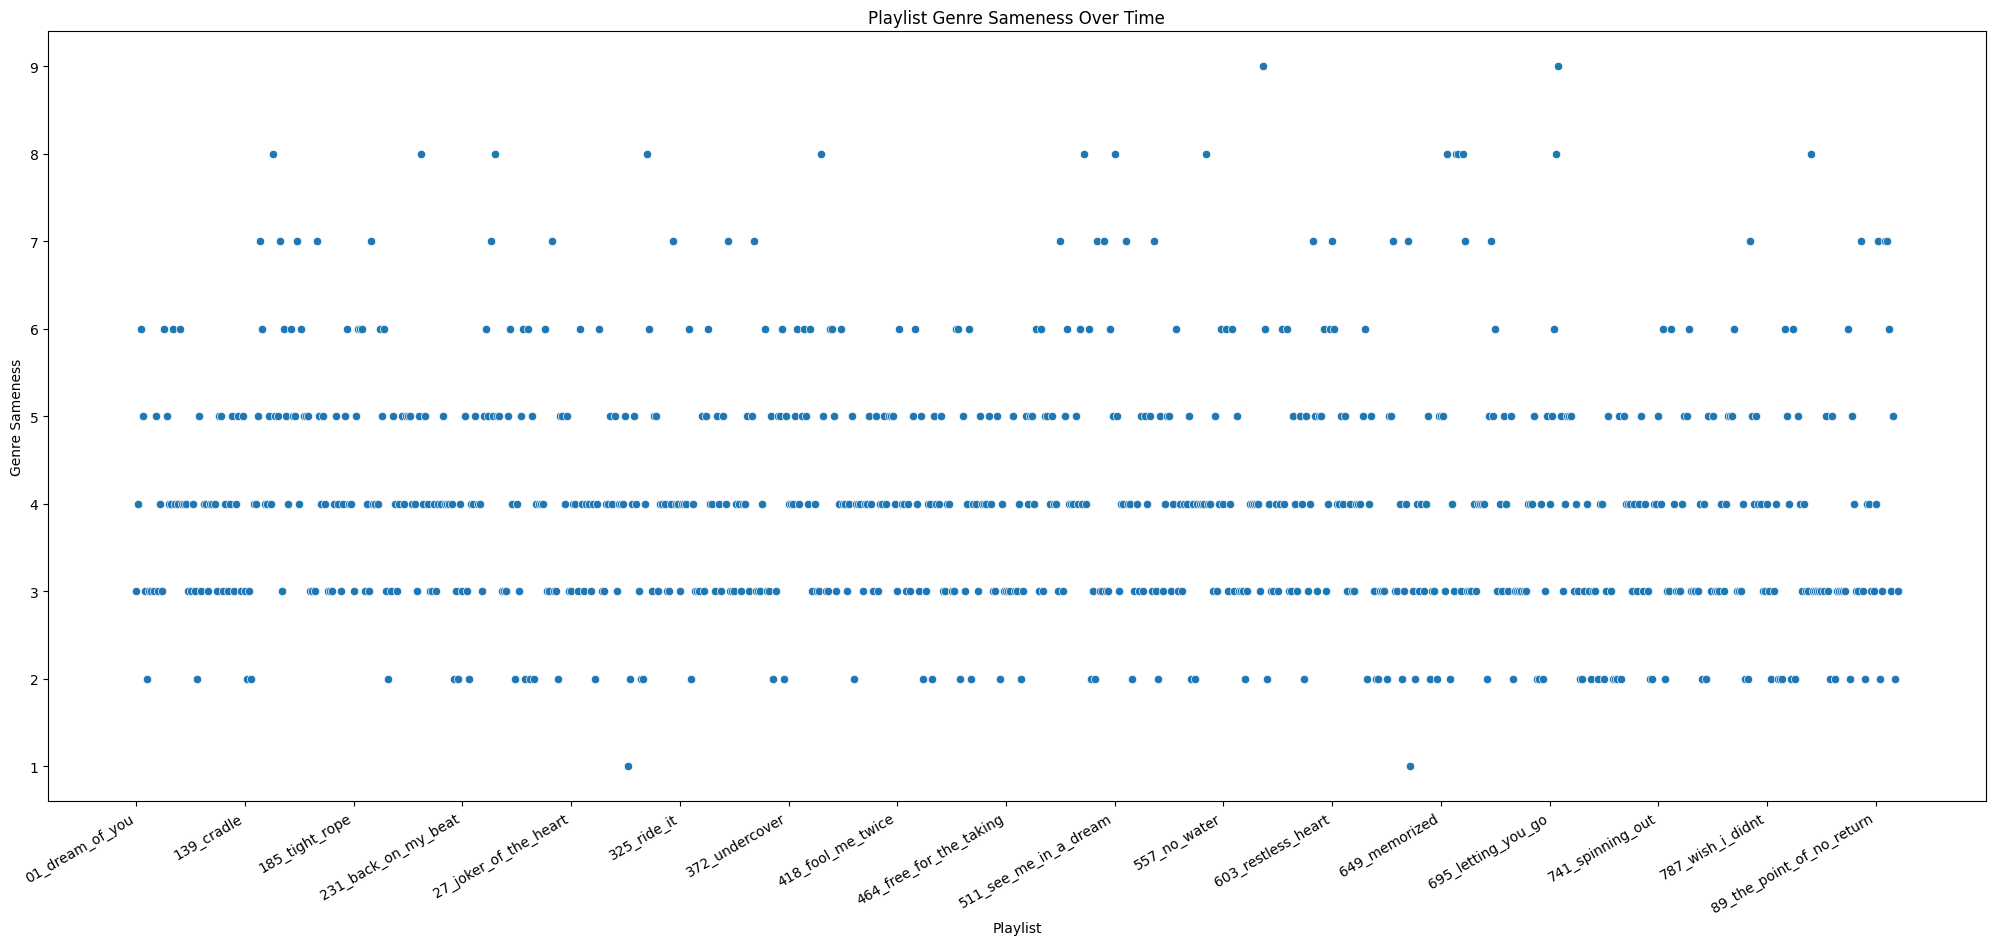

In [22]:
plt.figure(figsize=(25, 10))
sns.scatterplot(x='title', y='most_count', data=genres)
plt.xticks(ticks=np.arange(0, 830, 50), rotation=30, fontsize=10, horizontalalignment='right')
plt.xlabel('Playlist')
plt.ylabel('Genre Sameness')
plt.title('Playlist Genre Sameness Over Time')
# plt.figure(figsize=(20, 100))
plt.show()

**Intermediate: Heatmapping Genre Correlation**

In [23]:
dummy_genres = pd.get_dummies(genres['Genres'].explode()).groupby(level=0).sum()
dummy_genres

,2-step,21st century classical,5th wave emo,a cappella,abstract,abstract beats,abstract hip hop,acid rock,acoustic pop,adult standards,...,west coast rap,western americana,western mass indie,wisconsin indie,women's music,wonky,world,yacht rock,zolo,zoomergaze
title,,,,,,,,,,,,,,,,,,,,,
01_dream_of_you,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02_if_forever_never_comes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
03_just_one_word,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
04_take_it_back,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
05_too_hard_to_say,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95_times_up,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
96_curse_the_sun,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
97_rejoice,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Genre Correlation')

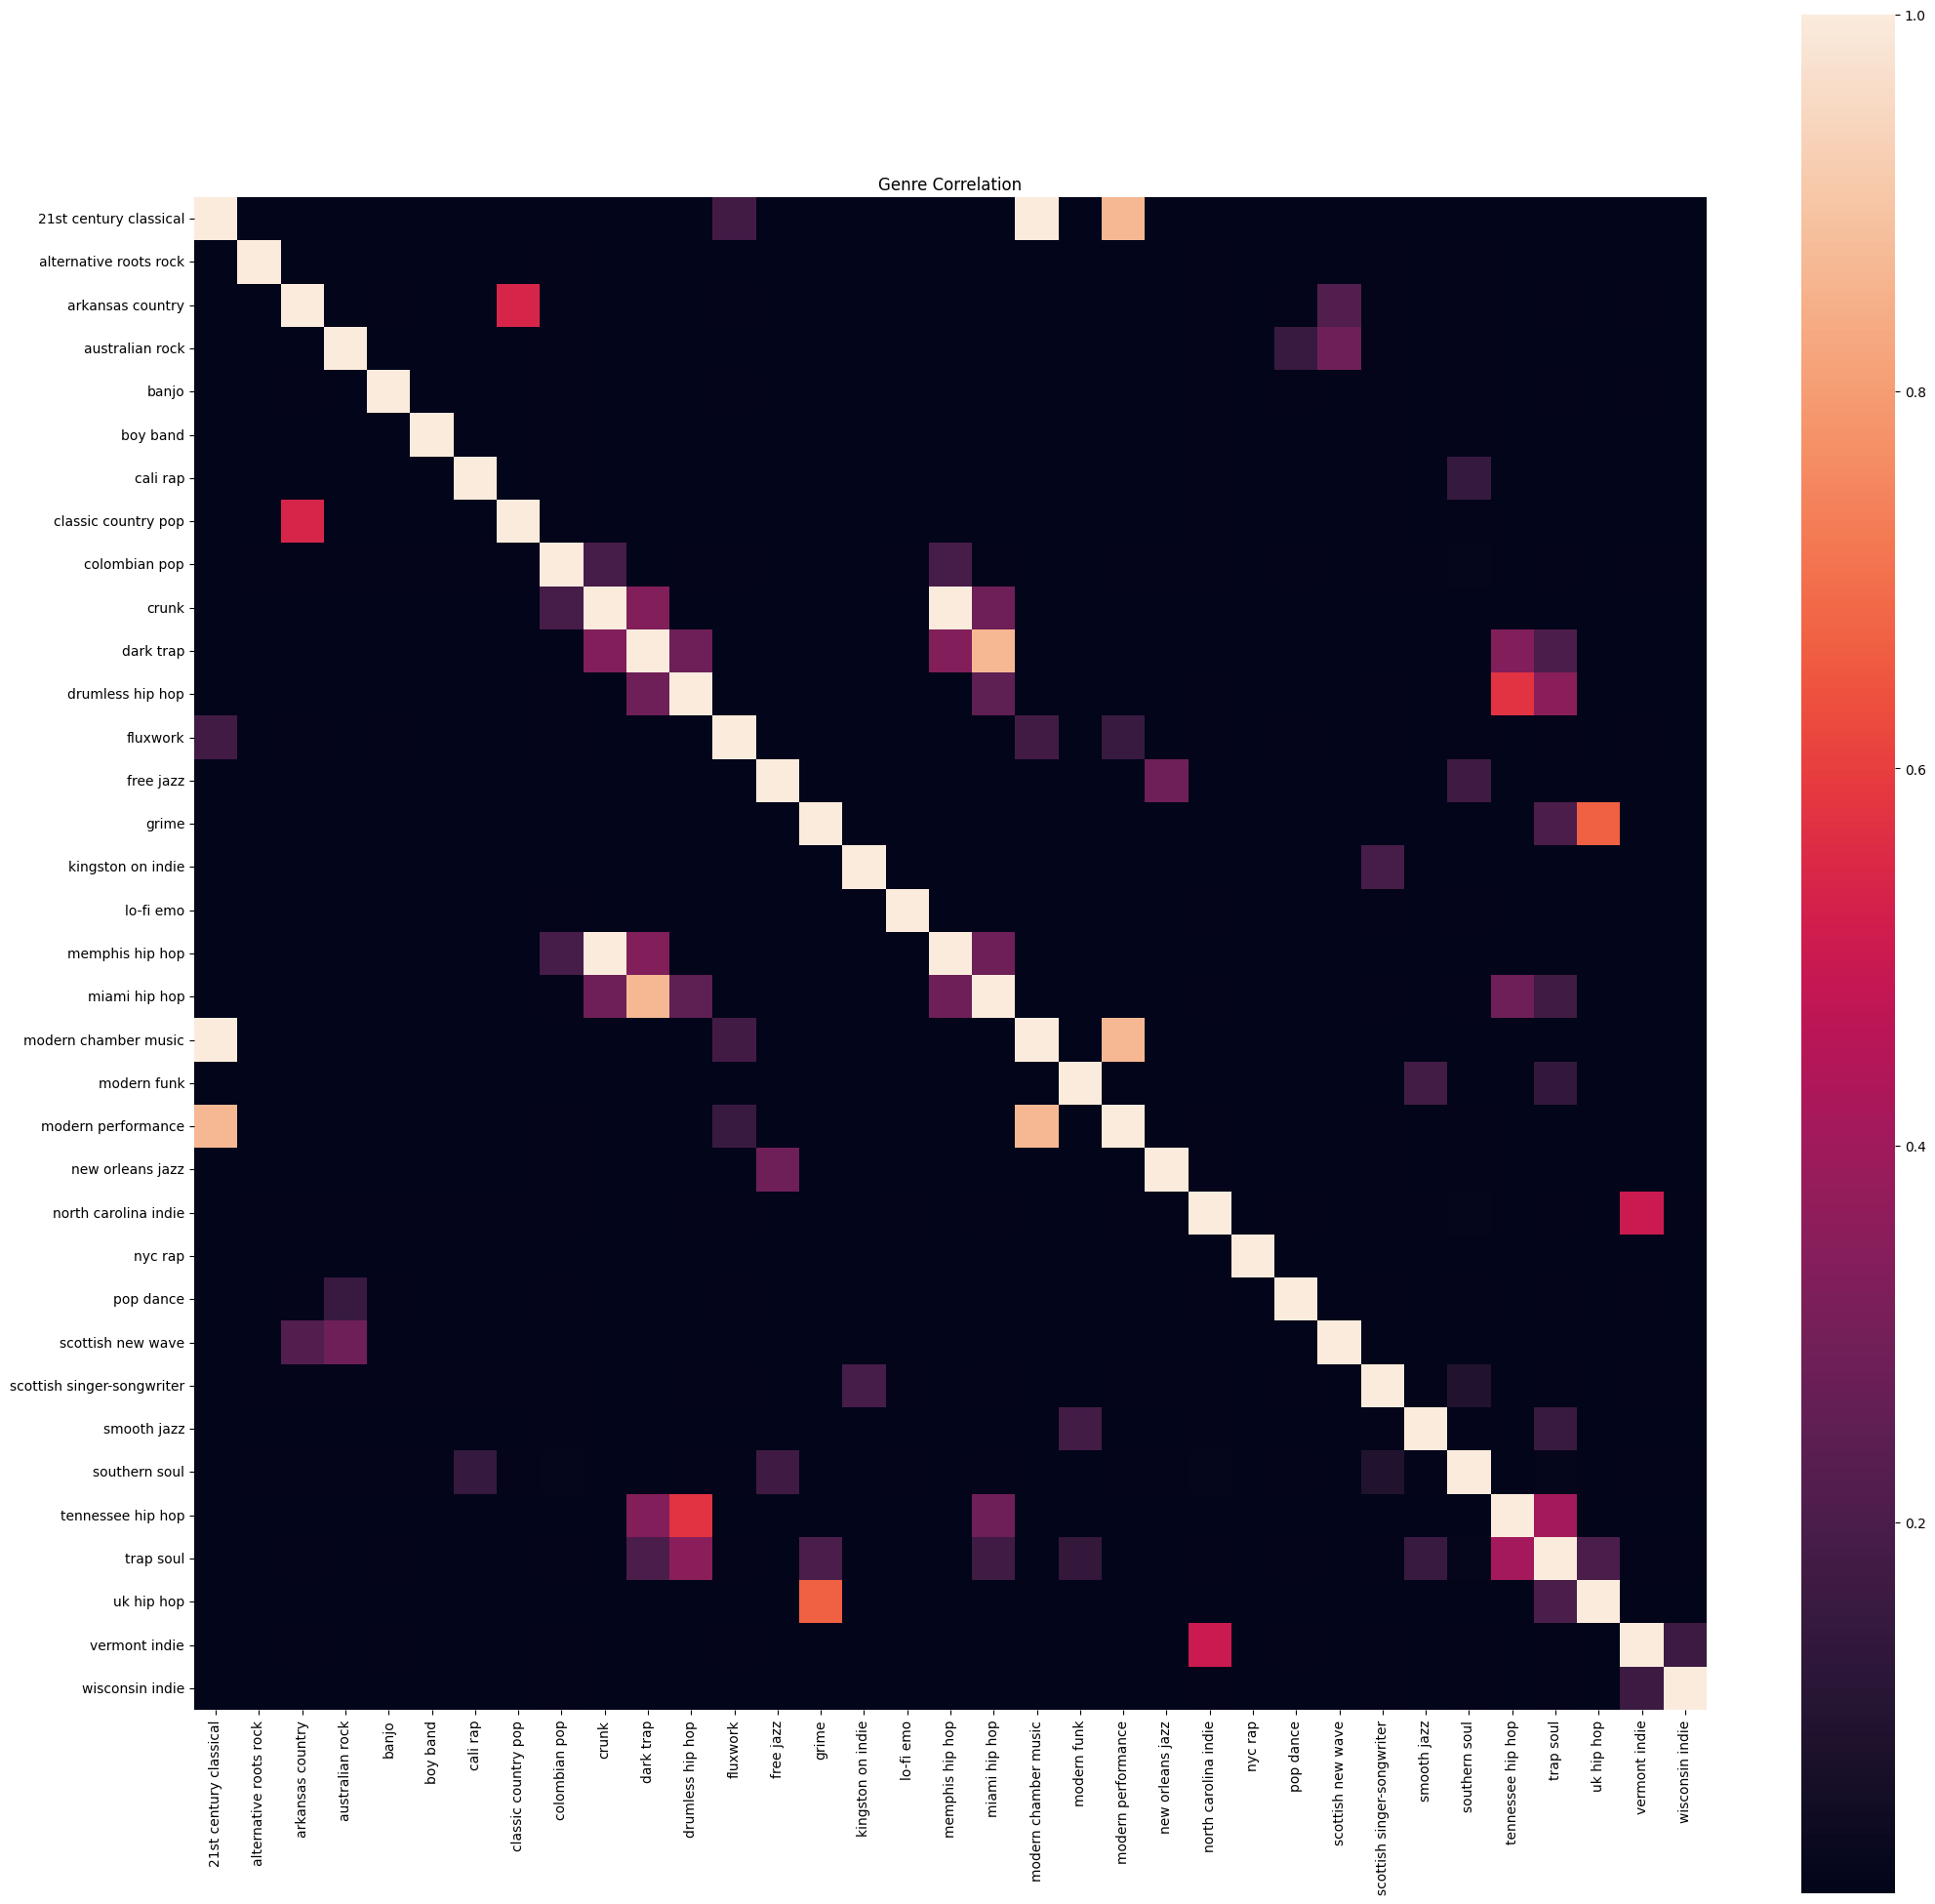

In [24]:
fig, ax = plt.subplots(figsize=(25,25)) 
cor = dummy_genres.corr().abs()
to_drop = [column for column in dummy_genres.columns if any(cor[column] < .002)]
reduced = dummy_genres.drop(to_drop, axis=1)
cor_reduced = reduced.corr().abs()
sns.heatmap(cor_reduced, square=True, ax=ax)
plt.title('Genre Correlation')

**Advanced: PCA**

In [25]:
features = ['title', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
filtered = p[features]
X = filtered.groupby('title').mean()
X

,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
title,,,,,,,,,,
01_dream_of_you,32.8,0.6062,0.6237,-7.4556,0.09844,0.309222,0.001457,0.18689,0.57220,116.3665
02_if_forever_never_comes,28.7,0.4886,0.5693,-7.7849,0.07197,0.409323,0.143142,0.12243,0.33659,122.2162
03_just_one_word,15.1,0.5561,0.5829,-8.7698,0.18092,0.336070,0.107029,0.15280,0.31716,116.1233
04_take_it_back,38.5,0.6348,0.6850,-7.5466,0.06146,0.169026,0.100664,0.18998,0.54200,113.2854
05_too_hard_to_say,44.6,0.6102,0.7207,-6.4651,0.07491,0.251672,0.018029,0.15993,0.45500,115.7380
...,...,...,...,...,...,...,...,...,...,...
95_times_up,30.5,0.5379,0.7138,-6.4285,0.27696,0.133376,0.012513,0.15997,0.54170,120.9394
96_curse_the_sun,30.9,0.6365,0.6097,-9.1395,0.10607,0.294050,0.186875,0.09952,0.49333,121.4584
97_rejoice,34.6,0.6540,0.6728,-6.4653,0.15216,0.244776,0.000777,0.17518,0.36581,122.3540


In [26]:
from sklearn.decomposition import PCA

X_normalized=(X - X.mean()) / X.std()

pca = PCA(n_components=10)
pca.fit(X_normalized)
pca_df = pd.DataFrame(pca.components_.T, columns=['PC%s' % i for i in range(len(X_normalized.columns))], index=X.columns)
pca_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Popularity,0.225415,-0.406934,0.191369,-0.123887,-0.431863,-0.726367,-0.095096,0.090458,0.000799,0.016764
Danceability,0.332323,-0.350243,-0.286729,0.017051,-0.095913,0.134359,0.441748,-0.670926,0.050041,-0.096691
Energy,0.434400,0.271444,-0.107951,0.026101,0.021412,-0.043854,-0.209417,0.084740,-0.049683,-0.818165
Loudness,0.434937,0.176952,-0.064011,-0.040811,0.079427,0.007830,-0.339629,-0.192592,-0.670808,0.406156
Speechiness,0.265307,-0.325294,0.224461,0.262436,-0.464896,0.612428,-0.140918,0.303819,0.005574,0.033902
Acousticness,-0.424052,-0.253565,0.121303,-0.008405,-0.044896,0.032888,0.280883,0.064122,-0.730007,-0.349408
Instrumentalness,-0.128961,0.435534,-0.334036,0.576147,-0.510202,-0.189281,0.196968,0.011604,-0.082440,0.091067
Liveness,0.215298,0.093157,0.672764,0.525531,0.331978,-0.144476,0.266691,-0.117478,0.009554,0.008639
Valence,0.380073,0.001034,-0.244713,-0.139444,0.199379,-0.038772,0.580604,0.606919,-0.072118,0.155905
Tempo,0.056830,0.488119,0.419810,-0.534320,-0.411238,0.134166,0.301393,-0.136744,0.003765,0.010191


In [27]:
most_important = [np.abs(pca.components_[i]).argmax() for i in range(9)]
most_important_features = [features[most_important[i]] for i in range(9)]
most_important_features

['Energy',
 'Valence',
 'Instrumentalness',
 'Acousticness',
 'Acousticness',
 'title',
 'Liveness',
 'Popularity',
 'Speechiness']

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

Valence is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

source: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

**Advanced: k-Means Clustering**

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

ss = StandardScaler()
scaled = ss.fit_transform(X)
scaled

array([[ 0.42256989,  0.72585294,  0.74308423, ...,  0.50973923,
         1.33507418, -0.23098695],
       [ 0.08335712, -0.81415727,  0.35833381, ..., -0.99347223,
        -0.80389713,  0.35530808],
       [-1.04183646,  0.06977716,  0.45452141, ..., -0.28524182,
        -0.98029123, -0.25536204],
       ...,
       [ 0.57149257,  1.35180947,  1.09034977, ...,  0.23666126,
        -0.53862511,  0.36911929],
       [ 0.64595391,  1.60323971,  0.13766813, ..., -0.29923386,
         0.5352636 , -0.45923279],
       [ 0.49703123,  0.06977716,  0.40713487, ...,  0.73524427,
        -0.01216635, -1.53417217]])

In [29]:
km = KMeans(n_clusters=5)
X['cluster'] = km.fit_predict(scaled)
X['cluster'] = X['cluster'].astype('category')
X.head()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,cluster
title,,,,,,,,,,,
01_dream_of_you,32.8,0.6062,0.6237,-7.4556,0.09844,0.309222,0.001457,0.18689,0.57220,116.3665,2
02_if_forever_never_comes,28.7,0.4886,0.5693,-7.7849,0.07197,0.409323,0.143142,0.12243,0.33659,122.2162,0
03_just_one_word,15.1,0.5561,0.5829,-8.7698,0.18092,0.336070,0.107029,0.15280,0.31716,116.1233,4
04_take_it_back,38.5,0.6348,0.6850,-7.5466,0.06146,0.169026,0.100664,0.18998,0.54200,113.2854,2
05_too_hard_to_say,44.6,0.6102,0.7207,-6.4651,0.07491,0.251672,0.018029,0.15993,0.45500,115.7380,2


Text(0.5, 1.0, 'Energy vs Valence')

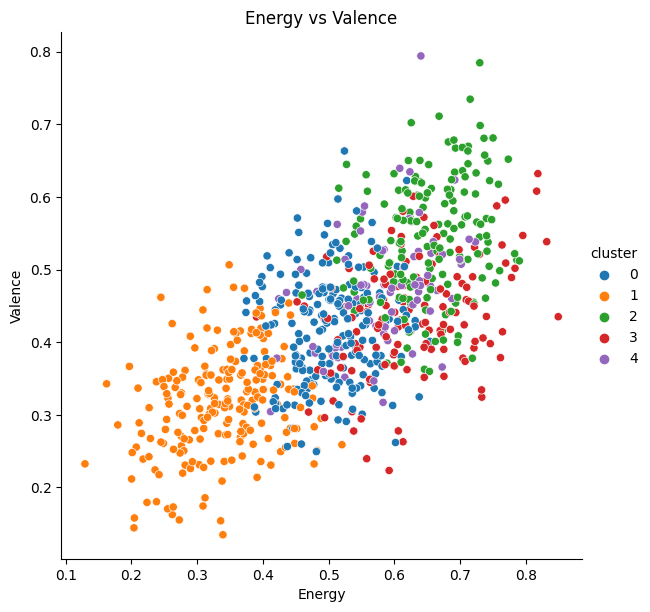

In [30]:
sns.relplot(x="Energy", y="Valence", hue="cluster", data=X, height=6)
plt.title('Energy vs Valence')

In [31]:
print(X[X['cluster']==2].index)

Index(['01_dream_of_you', '04_take_it_back', '05_too_hard_to_say',
       '07_slow_motion', '103_fool_myself', '105_work_of_art',
       '109_after_love', '112_modern_lover', '114_change_the_channel',
       '117_all_night_long',
       ...
       '812_spiraling', '818_switch_it_up', '820_surrender', '824_mirror',
       '82_suitcase', '87_resist_the_pull', '91_bribe_the_door',
       '92_the_big_city', '96_curse_the_sun', '98_the_shape_we_make'],
      dtype='object', name='title', length=166)


In [32]:
print(X[X['cluster']==0].index)

Index(['02_if_forever_never_comes', '06_you_make_me_feel', '100_the_end',
       '101_queen_of_corona', '106_lets_pretend', '107_love-line',
       '108_tidal_wave', '110_symphony', '115_cold_coffee',
       '118_whatever_happens',
       ...
       '814_shift_shapes', '816_hard_to_love', '817_cant_believe',
       '821_couldnt_tell_you', '822_classical_virtue',
       '826_running_in_circles', '84_the_grand_faade',
       '88_beneath_the_rising_sun', '89_the_point_of_no_return',
       '93_she_was_beautiful'],
      dtype='object', name='title', length=214)


Potential expansions:

- integrating spotify api access so users can analyze their own data by running the notebook
- using PCA to reduce number of features in k means to make more accurate clusters
- finding genre labels for clusters

spotify: amaya lim